In [40]:
from IPython.core.display import display, HTML, Javascript

color_map = ['#8A0030', '#BA1141']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

In [41]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

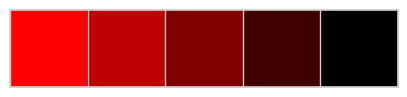

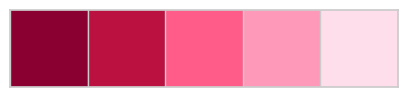

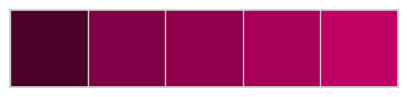

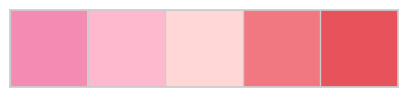

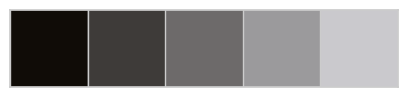

In [42]:
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [43]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Major Project/dataset.csv');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df=data

In [45]:
df.head()

,longitude,latitude,elevation,altitude,clutterheight,distance,loss
0,3.163405,6.675160,51,55,6,61,129
1,3.163405,6.675160,51,55,6,61,132
2,3.163405,6.675169,51,55,6,61,132
3,3.163405,6.675169,51,55,6,61,134
4,3.163405,6.675178,51,55,6,61,134


In [46]:
df.describe()

,longitude,latitude,elevation,altitude,clutterheight,distance,loss
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,3.163656,6.674493,54.283462,54.752765,5.777102,439.527931,143.077434
std,0.003758,0.002534,5.816332,3.879191,2.683505,269.577560,9.128563
min,3.155924,6.667566,45.000000,49.000000,4.000000,1.000000,104.000000
25%,3.160620,6.672988,49.000000,52.000000,4.000000,249.000000,139.000000
50%,3.163415,6.674525,54.000000,54.000000,6.000000,376.000000,145.000000
75%,3.166737,6.675745,59.000000,57.000000,6.000000,660.250000,149.000000
max,3.170550,6.678928,64.000000,64.000000,16.000000,1132.000000,162.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   longitude      3616 non-null   float64
 1   latitude       3616 non-null   float64
 2   elevation      3616 non-null   int64  
 3   altitude       3616 non-null   int64  
 4   clutterheight  3616 non-null   int64  
 5   distance       3616 non-null   int64  
 6   loss           3616 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 197.9 KB


In [48]:
df.isnull().sum()

longitude        0
latitude         0
elevation        0
altitude         0
clutterheight    0
distance         0
loss             0
dtype: int64

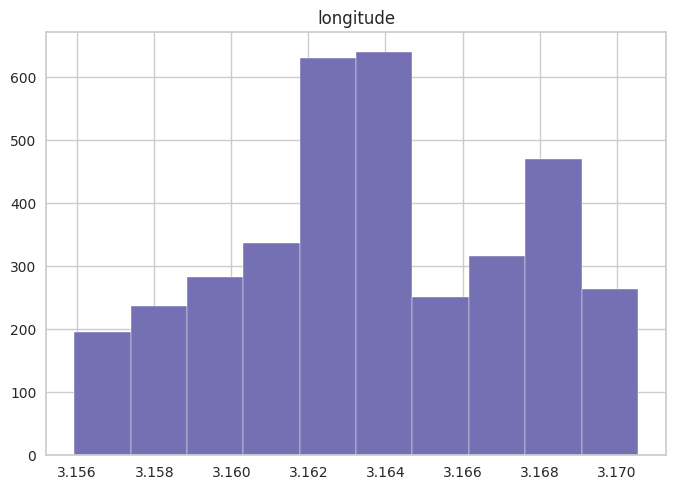

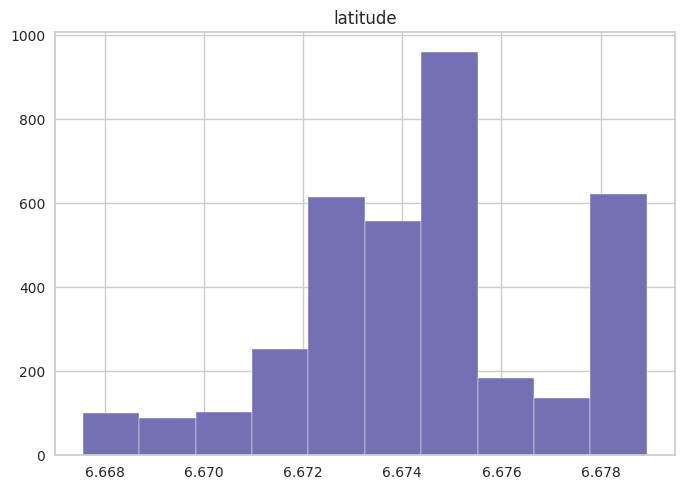

In [49]:
var_int = list(df.dtypes[df.dtypes=='float64'].index)

def plot_bar(variable):
    val = df[variable].values
    plt.hist(df[variable])
    plt.title("{}".format(variable))
    plt.show()
    
for c1 in var_int:
    plot_bar(c1)

In [50]:

# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
longitude,3616.000000,3.163656,0.003758,3.155924,3.160620,3.163415,3.166737,3.170550
latitude,3616.000000,6.674493,0.002534,6.667566,6.672988,6.674525,6.675745,6.678928
elevation,3616.000000,54.283462,5.816332,45.000000,49.000000,54.000000,59.000000,64.000000
altitude,3616.000000,54.752765,3.879191,49.000000,52.000000,54.000000,57.000000,64.000000
clutterheight,3616.000000,5.777102,2.683505,4.000000,4.000000,6.000000,6.000000,16.000000
distance,3616.000000,439.527931,269.577560,1.000000,249.000000,376.000000,660.250000,1132.000000
loss,3616.000000,143.077434,9.128563,104.000000,139.000000,145.000000,149.000000,162.000000


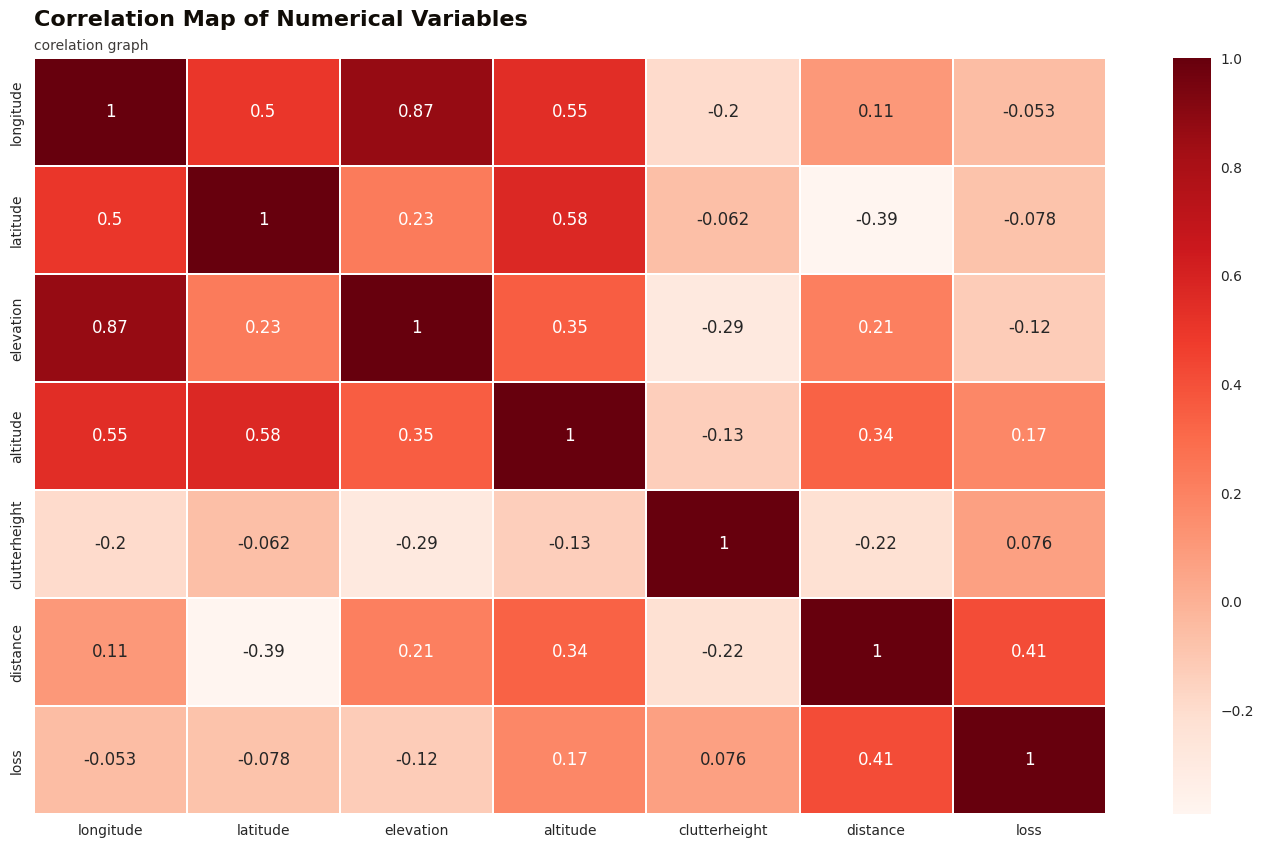

In [51]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('corelation graph', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [52]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

longitude,latitude,elevation,altitude,clutterheight,distance,loss
3.163405,6.675160,51,55,6,61,129
3.163405,6.675160,51,55,6,61,132
3.163405,6.675169,51,55,6,61,132
3.163405,6.675169,51,55,6,61,134
3.163405,6.675178,51,55,6,61,134


In [53]:
# --- Seperating Dependent Features ---
x = df.drop(['loss'], axis=1)
y = df['loss']

In [54]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#**Linear Regression**

In [56]:
# --- Applying Linear Regression ---
from sklearn.linear_model import LinearRegression

LRclassifier = LinearRegression()
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

Mean Absolute Error using Linear Regression :  59.48096773653076


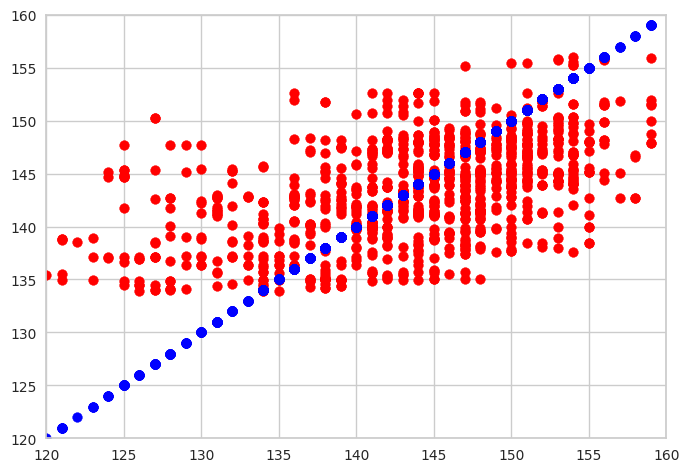

In [57]:
from sklearn.metrics import mean_squared_error

plt.scatter( y_test ,y_pred_LR ,color="red")
plt.scatter(y_test,y_test,color="blue")

plt.xlim(120, 160)
plt.ylim(120, 160)

meanSquaredError = mean_squared_error(y_test,y_pred_LR)
print("Mean Absolute Error using Linear Regression : ", meanSquaredError)

#**Applying GridSearch to find best suited values for SVM**

In [58]:
# --- Applying SVM ---

from sklearn.model_selection import GridSearchCV

param_grid={'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.077 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.079 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.079 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.079 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.075 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.077 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.079 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.079 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.079 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.079 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.077 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
param_grid={'C': [0.1,1,10,100,1000], 'degree': [1,3,4,5,7] , 'kernel': ['poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# grid.fit(x_train,y_train)

#**Applying Gaussian NB**



Mean Squared Error: 15299.77610532149


(100.0, 160.0)

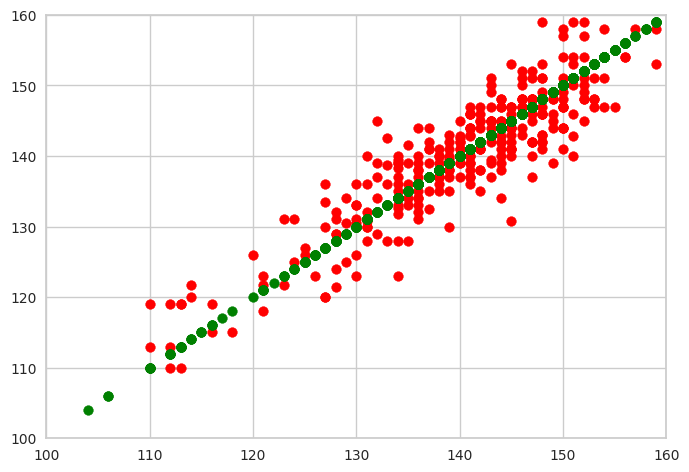

In [60]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = RBF()
regressorGaussianRegression = GaussianProcessRegressor(kernel=kernel, random_state=0)
regressorGaussianRegression.fit(x_train, y_train)

y_predGaussianRegressor = regressorGaussianRegression.predict(x_test)
mse = mean_squared_error(y_test, y_predGaussianRegressor)
print('Mean Squared Error:', mse)

plt.scatter( y_test ,y_predGaussianRegressor ,color="red")
plt.scatter(y_test,y_test,color="green")
plt.ylim(100, 160)
plt.xlim(100, 160)

#**Implementation of Decision Tree**

Mean Squared Error: 14.193848822324627


(130.0, 160.0)

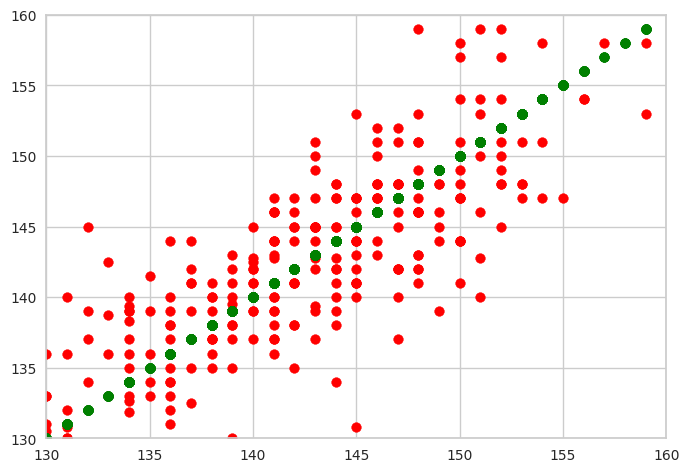

In [61]:
# --- Applying Decision Tree ---
from sklearn.tree import DecisionTreeRegressor

regressorDecisionTree = DecisionTreeRegressor()
regressorDecisionTree.fit(x_train, y_train)

y_predDecisionTree = regressorDecisionTree.predict(x_test)

mse = mean_squared_error(y_test, y_predDecisionTree)
print('Mean Squared Error:', mse)

plt.scatter( y_test ,y_predGaussianRegressor ,color="red")
plt.scatter(y_test,y_test,color="green")
plt.ylim(130, 160)
plt.xlim(130, 160)

#**Random Forest**

Mean Squared Error: 38.3955071818738


(100.0, 160.0)

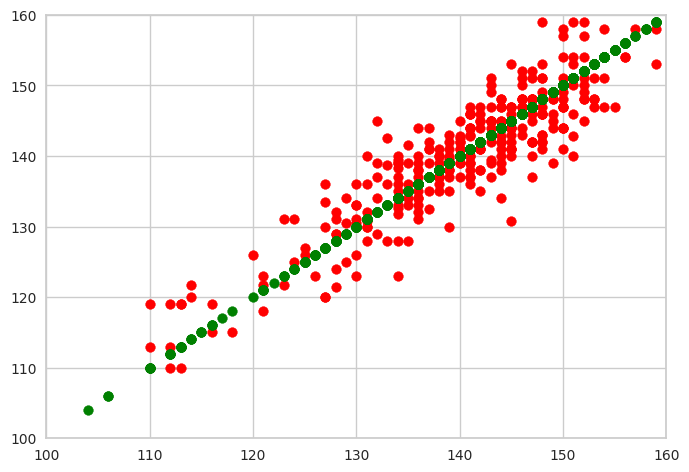

In [62]:
# --- Applying Random Forest ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
randomForestRegressor = RandomForestRegressor(n_estimators=50, min_samples_split=400, random_state=0)
randomForestRegressor.fit(x_train, y_train)

y_predRandomForest = randomForestRegressor.predict(x_test)

mse = mean_squared_error(y_test, y_predRandomForest)
print('Mean Squared Error:', mse)
plt.scatter( y_test ,y_predGaussianRegressor ,color="red")
plt.scatter(y_test,y_test,color="green")
plt.ylim(100, 160)
plt.xlim(100, 160)

#**Gradient Boosting Implementation**

Mean Squared Error: 19.23026222899496


(100.0, 160.0)

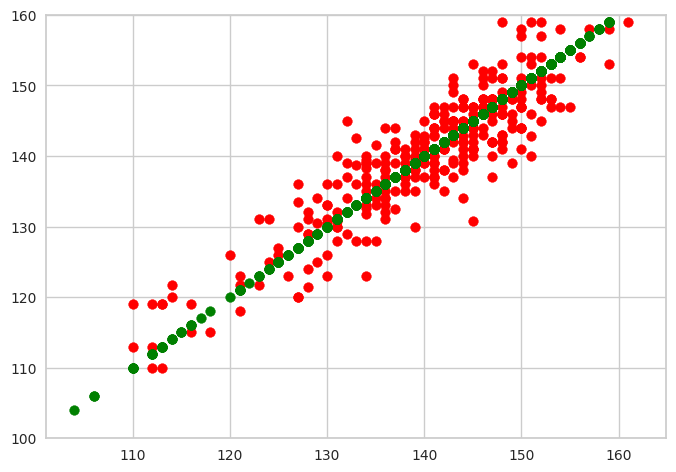

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingRegressor(n_estimators=1000, learning_rate=1, max_depth=1, random_state=42)

GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
plt.scatter( y_test ,y_predGaussianRegressor ,color="red")
plt.scatter(y_test,y_test,color="green")
plt.ylim(100, 160)

#**Neural Networks**
1. Multilayer Perceptron
2. Recursive Neural Networks
3. Recurrent Neural Networks
4. Sequence-to-Sequence
    1. two concurrent neural networks
    2. swalow neural networks

###**Multilayer Perceptron**

Epoch 1/50
80/80 [==============================] - 1s 2ms/step - loss: 20272.2520
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 18762.2930
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 14189.8369
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 7060.2100
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 2241.7959
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 1177.9917
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 1078.3160
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 1017.4390
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 956.2505
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 895.9704
Epoch 11/50
80/80 [==============================] - 0s 2ms/step - loss: 836.2870
Epoch 12/50
80/80 [==============================] - 0s 2ms/step - loss: 777.6911
Epoch 13/50
80

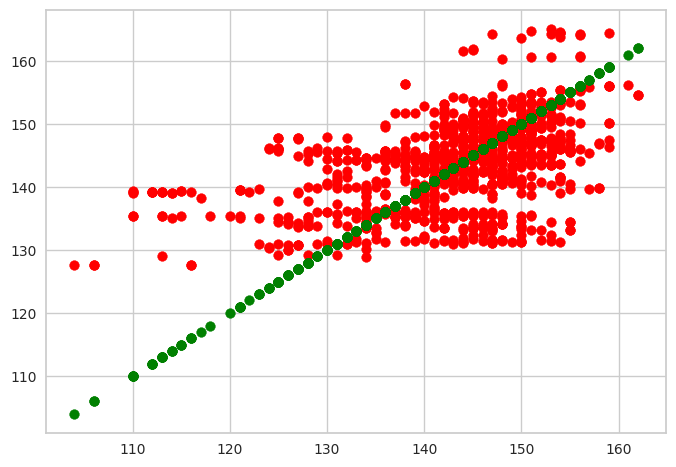

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

perceptronModel = Sequential()
perceptronModel.add(Dense(32, input_dim=6, activation='relu'))
perceptronModel.add(Dense(16, activation='relu'))
perceptronModel.add(Dense(1, activation='linear'))

perceptronModel.compile(loss='mean_squared_error', optimizer=Adam())

perceptronModel.fit(x_train, y_train, epochs=50, batch_size=32)

y_predPerceptronModel = perceptronModel.predict(x_test)

mse = mean_squared_error(y_test, y_predPerceptronModel)
print('Mean Squared Error:', mse)

plt.scatter( y_test ,y_predPerceptronModel ,color="red")
plt.scatter(y_test,y_test,color="green")

Epoch 1/500
80/80 [==============================] - 1s 3ms/step - loss: 20141.8574
Epoch 2/500
80/80 [==============================] - 0s 3ms/step - loss: 18376.3359
Epoch 3/500
80/80 [==============================] - 0s 3ms/step - loss: 15440.1836
Epoch 4/500
80/80 [==============================] - 0s 3ms/step - loss: 12191.4346
Epoch 5/500
80/80 [==============================] - 0s 3ms/step - loss: 8919.6289
Epoch 6/500
80/80 [==============================] - 0s 4ms/step - loss: 5863.3198
Epoch 7/500
80/80 [==============================] - 0s 3ms/step - loss: 3471.5583
Epoch 8/500
80/80 [==============================] - 0s 3ms/step - loss: 1848.3326
Epoch 9/500
80/80 [==============================] - 0s 4ms/step - loss: 889.8645
Epoch 10/500
80/80 [==============================] - 0s 3ms/step - loss: 403.4287
Epoch 11/500
80/80 [==============================] - 0s 2ms/step - loss: 194.0396
Epoch 12/500
80/80 [==============================] - 0s 3ms/step - loss: 116.4132
E

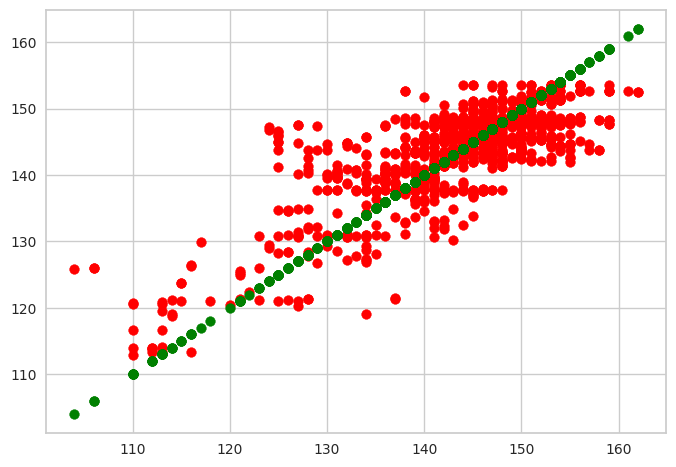

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

perceptronModel = Sequential()
perceptronModel.add(Dense(32, input_dim=6, activation='relu'))
perceptronModel.add(Dense(32, input_dim=6, activation='sigmoid'))
perceptronModel.add(Dense(16, activation='relu'))
perceptronModel.add(Dense(1, activation='linear'))

perceptronModel.compile(loss='mean_squared_error', optimizer=Adam())

perceptronModel.fit(x_train, y_train, epochs=500, batch_size=32)

y_predPerceptronModel = perceptronModel.predict(x_test)

mse = mean_squared_error(y_test, y_predPerceptronModel)
print('Mean Squared Error:', mse)

plt.scatter( y_test ,y_predPerceptronModel ,color="red")
plt.scatter(y_test,y_test,color="green")

In [66]:
from yellowbrick.model_selection.rfecv import rfecv
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier()
rfecv= RFECV(estimator=rfc,step=1,cv=StratifiedKFold(5),scoring='r2',verbose=1)
X_components = df.columns
X=df[X_components]
y=df['loss']

rfecv.fit(X,y)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator wi

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='r2', verbose=1)

In [67]:
X_components

Index(['longitude', 'latitude', 'elevation', 'altitude', 'clutterheight',
       'distance', 'loss'],
      dtype='object')

In [68]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -27.502 (3.078)


In [69]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=7, n_informative=4, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -17.624 (1.909)


In [70]:
n_scores

array([-18.8411222 , -19.09069695, -17.64989394, -15.35660046,
       -17.47195177, -18.37995313, -21.87762926, -13.86761728,
       -18.86647478, -17.79785863, -20.09687558, -19.55334912,
       -14.49244043, -15.06584358, -19.40579862, -16.595931  ,
       -16.864833  , -16.14320602, -17.44030056, -14.99373083,
       -17.77186811, -19.64239925, -17.70802477, -17.38073695,
       -16.34580365, -16.83940086, -20.44570112, -15.24363704,
       -17.41965993, -20.06739459])

In [71]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.027)


Epoch 1/500
80/80 [==============================] - 1s 3ms/step - loss: 19675.6875
Epoch 2/500
80/80 [==============================] - 0s 3ms/step - loss: 17130.3926
Epoch 3/500
80/80 [==============================] - 0s 3ms/step - loss: 13386.3828
Epoch 4/500
80/80 [==============================] - 0s 3ms/step - loss: 9661.2617
Epoch 5/500
80/80 [==============================] - 0s 3ms/step - loss: 6309.7485
Epoch 6/500
80/80 [==============================] - 0s 3ms/step - loss: 3605.1228
Epoch 7/500
80/80 [==============================] - 0s 3ms/step - loss: 1761.5438
Epoch 8/500
80/80 [==============================] - 0s 3ms/step - loss: 760.3480
Epoch 9/500
80/80 [==============================] - 0s 3ms/step - loss: 311.2696
Epoch 10/500
80/80 [==============================] - 0s 3ms/step - loss: 146.6132
Epoch 11/500
80/80 [==============================] - 0s 3ms/step - loss: 98.1598
Epoch 12/500
80/80 [==============================] - 0s 3ms/step - loss: 86.1799
Epoch

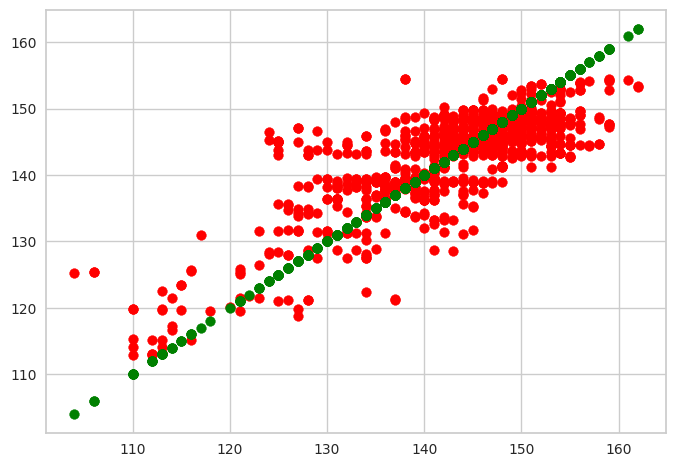

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

perceptronModel = Sequential()
perceptronModel.add(Dense(32, input_dim=6, activation='relu'))
perceptronModel.add(Dense(32, input_dim=6, activation='sigmoid'))
perceptronModel.add(Dense(16, activation='relu'))
perceptronModel.add(Dense(1, activation='linear'))

perceptronModel.compile(loss='mean_squared_error', optimizer=Adam())

perceptronModel.fit(x_train, y_train, epochs=500, batch_size=32)

y_predPerceptronModel = perceptronModel.predict(x_test)

mse = mean_squared_error(y_test, y_predPerceptronModel)
print('Mean Squared Error:', mse)

plt.scatter( y_test ,y_predPerceptronModel ,color="red")
plt.scatter(y_test,y_test,color="green")

#LAST

In [73]:
dataset = df
dataset

,longitude,latitude,elevation,altitude,clutterheight,distance,loss
0,3.163405,6.675160,51,55,6,61,129
1,3.163405,6.675160,51,55,6,61,132
2,3.163405,6.675169,51,55,6,61,132
3,3.163405,6.675169,51,55,6,61,134
4,3.163405,6.675178,51,55,6,61,134
...,...,...,...,...,...,...,...
3611,3.156015,6.667575,47,55,6,1129,151
3612,3.156024,6.667575,47,55,6,1128,151
3613,3.156033,6.667575,47,55,6,1128,147
3614,3.156033,6.667566,47,55,6,1128,147


In [74]:
from sklearn.preprocessing import StandardScaler
newScaler = StandardScaler()
dataset['distance_clutterheight'] = dataset['distance']*dataset['clutterheight']
dataset['distance_altitude'] = dataset['distance']*dataset['altitude']
dataset['distance_elevation'] = dataset['distance']*dataset['elevation']
dataset['clutterheight_elevation'] = dataset['clutterheight']*dataset['elevation']
dataset['clutterheight_altitude'] = dataset['clutterheight']*dataset['altitude']

In [75]:
X = dataset.drop(['loss'], axis=1)
Y = dataset['loss']
X = MinMaxScaler().fit_transform(X)

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Epoch 1/1000
91/91 [==============================] - 1s 2ms/step - loss: 20284.1172
Epoch 2/1000
91/91 [==============================] - 0s 2ms/step - loss: 19752.3711
Epoch 3/1000
91/91 [==============================] - 0s 2ms/step - loss: 19298.6133
Epoch 4/1000
91/91 [==============================] - 0s 2ms/step - loss: 18909.7793
Epoch 5/1000
91/91 [==============================] - 0s 2ms/step - loss: 18625.8379
Epoch 6/1000
91/91 [==============================] - 0s 2ms/step - loss: 18359.5508
Epoch 7/1000
91/91 [==============================] - 0s 2ms/step - loss: 18102.3730
Epoch 8/1000
91/91 [==============================] - 0s 2ms/step - loss: 17851.5371
Epoch 9/1000
91/91 [==============================] - 0s 2ms/step - loss: 17605.5176
Epoch 10/1000
91/91 [==============================] - 0s 2ms/step - loss: 17363.5684
Epoch 11/1000
91/91 [==============================] - 0s 2ms/step - loss: 17125.1113
Epoch 12/1000
91/91 [==============================] - 0s 2ms/s

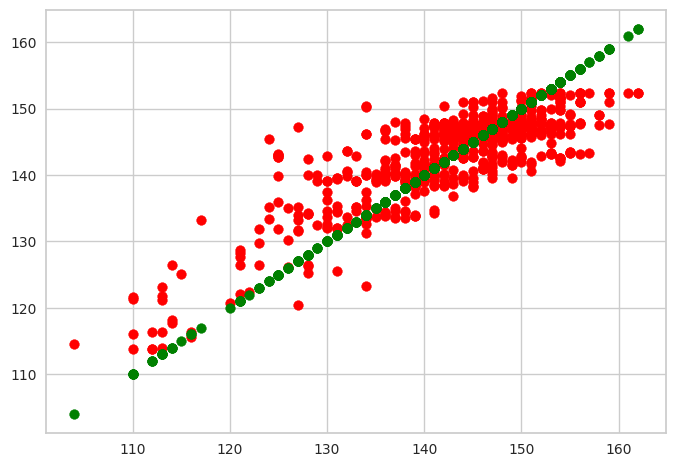

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

perceptronModel = Sequential()
perceptronModel.add(Dense(32, input_dim=11, activation='relu'))
perceptronModel.add(Dense(32, input_dim=11, activation='sigmoid'))
perceptronModel.add(Dense(16, activation='relu'))
perceptronModel.add(Dense(16, activation='sigmoid'))
perceptronModel.add(Dense(1, activation='linear'))

perceptronModel.compile(loss='mean_squared_error', optimizer=Adam())

perceptronModel.fit(X_train, Y_train, epochs=1000, batch_size=32)

Y_predPerceptronModel = perceptronModel.predict(X_test)

mse = mean_squared_error(Y_test, Y_predPerceptronModel)
print('Mean Squared Error:', mse)

plt.scatter( Y_test ,Y_predPerceptronModel ,color="red")
plt.scatter(Y_test,Y_test,color="green")